<a href="https://colab.research.google.com/github/Trisdoan/Ecommerce_UK/blob/main/Ecommerce_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import sklearn 

# Clean Data

## Import data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Projects/Ecommerce_UK.csv", encoding="ISO-8859-1")
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Check Null and Drop Null

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.dropna(inplace=True)

## Drop Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

## Add new column: Sale = UnitPrice x Quantity

In [ ]:
df["Sale"] =  df["Quantity"] * df["UnitPrice"]

## Cast InvoiceDate into Datetime

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")

## Cast CustomerID into int

In [ ]:
df["CustomerID"] = df["CustomerID"].astype(int)

## Add the columns - Month, Day and Hour for the invoice

In [ ]:
df.insert(loc=2, column='Year_Month', value=df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.dayofweek
df["Hour"] = df["InvoiceDate"].dt.hour

## Rearrange column

In [ ]:
df = df[["InvoiceNo","StockCode","InvoiceDate","Year_Month","Month","Day","Hour","CustomerID","Country","Description","Quantity","UnitPrice","Sale"]]

In [ ]:
df.head()

,InvoiceNo,StockCode,InvoiceDate,Year_Month,Month,Day,Hour,CustomerID,Country,Description,Quantity,UnitPrice,Sale
0,536365,85123A,2010-12-01 08:26:00,201012,12,2,8,17850,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,536365,71053,2010-12-01 08:26:00,201012,12,2,8,17850,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,536365,84406B,2010-12-01 08:26:00,201012,12,2,8,17850,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,536365,84029G,2010-12-01 08:26:00,201012,12,2,8,17850,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,536365,84029E,2010-12-01 08:26:00,201012,12,2,8,17850,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


# EDA

## How many orders made by the customers?

In [ ]:
count_orders = df.groupby(by=["CustomerID","Country"], as_index=False)["InvoiceNo"].count()
count_orders

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,2
1,12347,Iceland,84
2,12348,Finland,28
3,12350,Norway,17
4,12352,Norway,48
...,...,...,...
2283,18272,United Kingdom,33
2284,18273,United Kingdom,1
2285,18277,United Kingdom,1
2286,18280,United Kingdom,10


## TOP 5 most number of orders

# Visualization


# Sale Prediction

## Goal: Predict Sale for UK market

Build a model that predict total sale of an invoice when we have unitprice of an item, quantity of that item and month that customer make an purchase


1.   Feature: UnitPrice, Quantity and Month purchase
2.   Target: Sale of that invoice



In [ ]:
data = df[df["Country"] == "United Kingdom"].groupby(["InvoiceNo","StockCode"]).sum()

In [ ]:
data.head()

Year_Month  Month  Day  Hour  CustomerID  Quantity  \
InvoiceNo StockCode                                                       
536365    21730          201012     12    2     8       17850         6   
          22752          201012     12    2     8       17850         2   
          71053          201012     12    2     8       17850         6   
          84029E         201012     12    2     8       17850         6   
          84029G         201012     12    2     8       17850         6   

                     UnitPrice   Sale  
InvoiceNo StockCode                    
536365    21730           4.25  25.50  
          22752           7.65  15.30  
          71053           3.39  20.34  
          84029E          3.39  20.34  
          84029G          3.39  20.34

## X and y arrays

In [ ]:
X = data[["UnitPrice","Quantity","Month"]]
y = data["Sale"]

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Create and training model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

## Model evaluation

In [ ]:
lm.intercept_

11.292793824028871

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
UnitPrice,-0.875671
Quantity,1.001855
Month,-0.058884


## Prediction from model

In [ ]:
predictions = lm.predict(X_test)

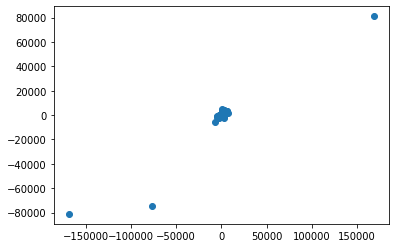

In [ ]:
plt.scatter(y_test, predictions)

### Residual Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


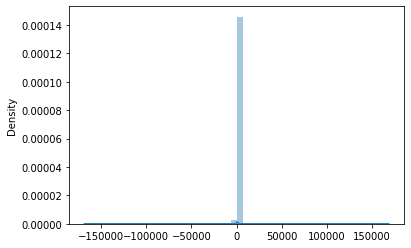

In [ ]:
sns.distplot((y_test, predictions))

## Regression Evaluation Metrics

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 16.069356132984968
MSE: 112363.24447221089
RMSE: 335.2062715287572
